In [8]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/SST'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_SST_bertT_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_SST_bertT_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/BERT/Bert_SST/Bert_linear_SST/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(872,)

In [10]:
pred = old_prediction

In [11]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon) / app_k.shape[0]

0.7889908256880734

# can find smallest k

In [12]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

688

In [13]:
np.mean(app_k_nonon)

302.6511627906977

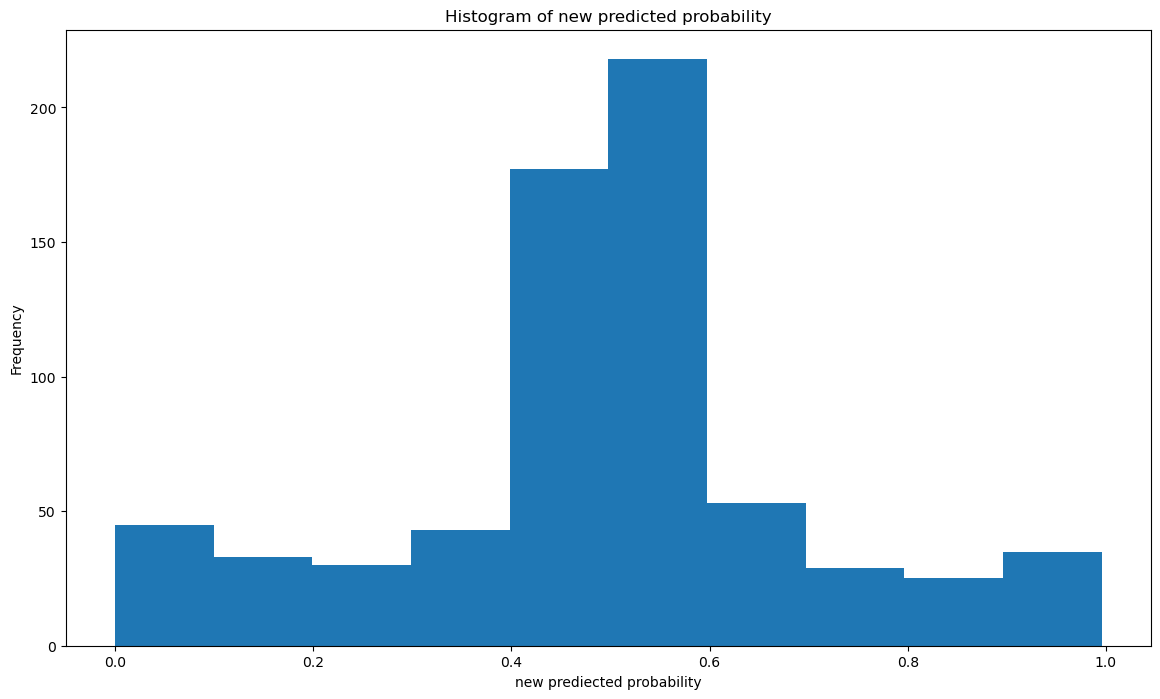

In [14]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

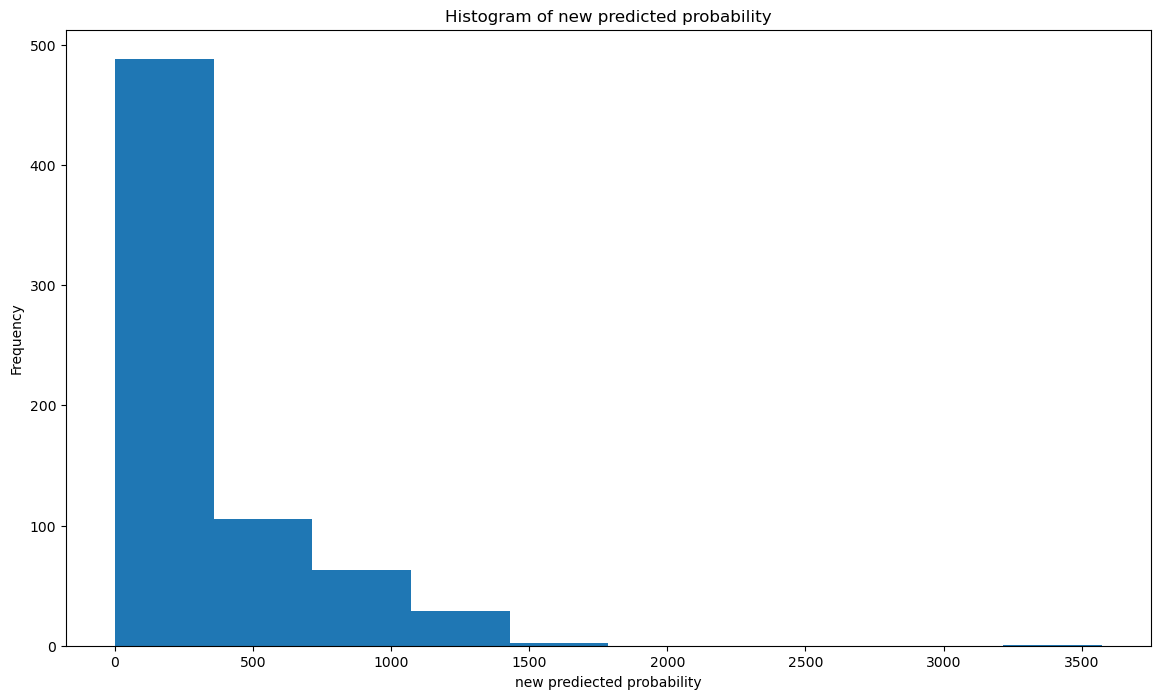

In [15]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [16]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1298):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
i 1
old 0.3366313095316737
new 0.5125646335422843
appro k 74
flip label [1.]

i 2
i 3
old 0.8261250460689007
new 0.3106961964281433
appro k 248
flip label [1.]

i 4
old 0.8592872418244673
new 0.21150985394745825
appro k 384
flip label [1.]

i 5
i 6
i 7
old 0.5555046242215256
new 0.4840746897682179
appro k 23
flip label [1.]

i 8
i 9
old 0.4722772336736302
new 0.4991310064379085
appro k 8
flip label [0.]

i 10
old 0.9088971021235893
new 0.00022880578783090837
appro k 3572
flip label [1.]

i 11
i 12
i 13
old 0.8914215686461545
new 0.06796193121677449
appro k 955
flip label [1.]

i 14
old 0.5630459569677988
new 0.4894522233149357
appro k 13
flip label [1.]

i 15
old 0.6421060040983152
new 0.4925461240557609
appro k 79
flip label [1.]

i 16
old 0.7239398330691722
new 0.468937961436645
appro k 130
flip label [1.]

i 17
old 0.7995523061199984
new 0.37125483839972556
appro k 323
flip label [1.]

i 18
i 19
i 20
old 0.5176193958334425
new 0.498161029699241
appro k 9
flip label [1.]

i 21
i 

IndexError: index 872 is out of bounds for axis 0 with size 872

In [17]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

627

In [11]:
app_k.shape

(872,)

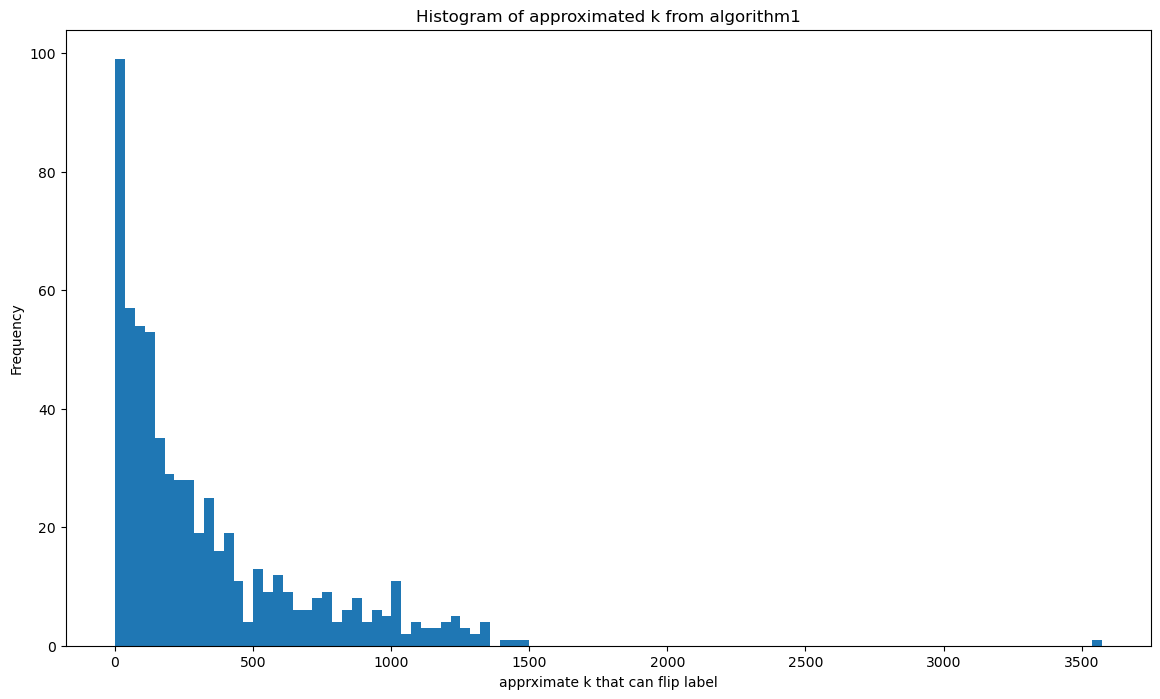

In [12]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

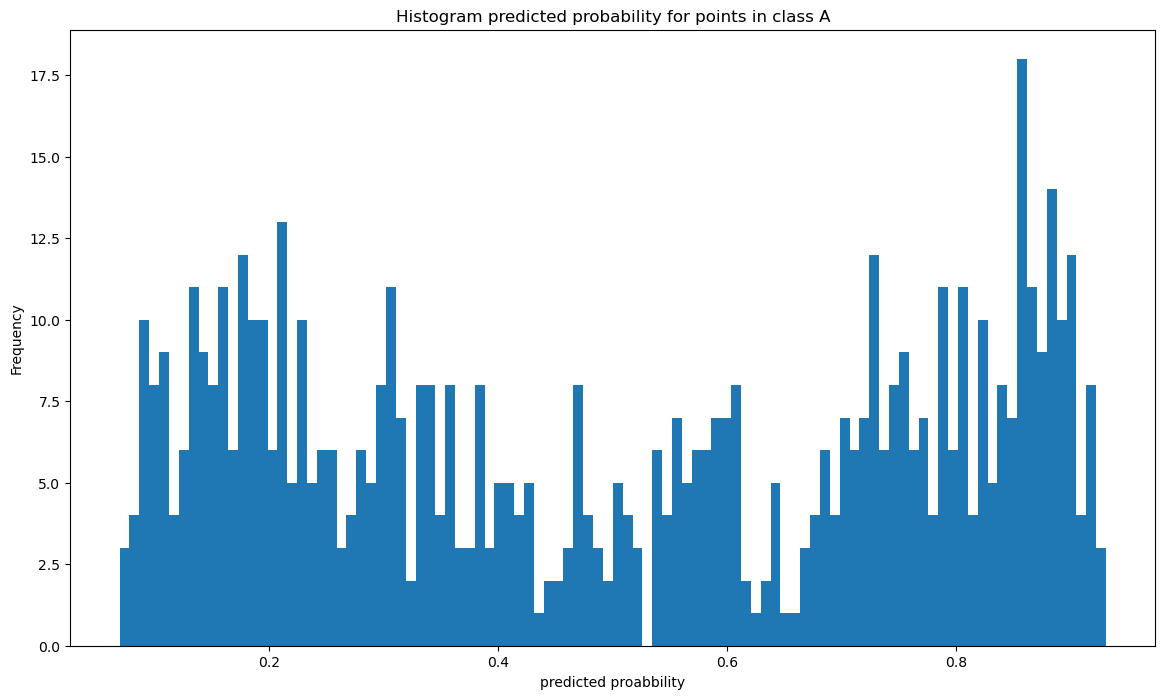

In [13]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [14]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

61

In [16]:
# flip the label
num_noflip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_noflip

585

In [18]:
# cannot find k
num_noflip = np.sum([flips[i] == 2 for i in range(len(new_pred_k))])
num_noflip

184

In [13]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.3039545124512317, 0.026253810023244502)

In [14]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.07742348256395727, 0.004163333931532753)